In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [4]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.drop(["id","zipcode","lat","long","date"], axis=1,inplace=True)

In [5]:
raw_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503


In [6]:
raw_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [15]:
raw_data.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

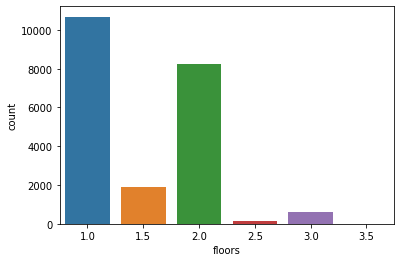

In [16]:
sb.countplot(x='floors',data=raw_data)

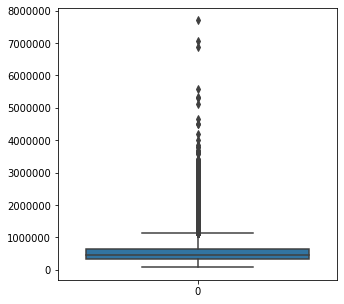

In [28]:
sb.boxplot(data=raw_data['price'])
fig=plt.gcf()
fig.set_size_inches(5,5)

In [39]:
raw_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
raw_data_f= raw_data.dropna()

In [41]:
raw_data_f.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)

input shape:  (21611, 15)
output shape:  (21611,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)

In [60]:
reg_model = linear_model.LinearRegression()

In [61]:
reg_model.fit(X_train, y_train)
y_predicted = reg_model.predict(X_test)

In [62]:
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})

In [63]:
print(reg_model.score(X_test,y_test)*100)

65.41868276581462


In [102]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
regr = MLPRegressor(hidden_layer_sizes=512, solver='adam',
                    max_iter=200, activation='relu',
                    random_state=1,learning_rate='constant',
                    learning_rate_init=0.01,
                    batch_size=2)
regr.fit(X_train, y_train)

input shape:  (21611, 15)
output shape:  (21611,)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=2, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=512, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
y_predicted = regr.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(regr.score(X_test,y_test)*100)
print('Mean Squared Error: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))

73.49689368448851
Mean Squared Error: 11909.560039
Root Mean Squared Error: 109.13093071750433
Mean Absolute Error: 88.17634216211113


In [146]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
reg = GradientBoostingRegressor(random_state=241, max_depth=3, learning_rate=0.1, n_estimators=100)
reg.fit(X_train, y_train)

input shape:  (21611, 15)
output shape:  (21611,)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=241, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
y_predicted = reg.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(reg.score(X_test,y_test)*100)
print('Mean Squared Error: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))

59.60977871088395
Mean Squared Error: 18149.939095
Root Mean Squared Error: 134.72170981144177
Mean Absolute Error: 106.23313803688812


In [186]:
import tensorflow as tf
import time
import math

In [212]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("input shape: ",X_train.shape)
print("output shape: ",y_train.shape)

input shape:  (15127, 15)
output shape:  (15127,)


In [229]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(15,))
])

In [230]:
model.compile(loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.1),
        metrics=['accuracy'])

In [231]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [232]:
tf.keras.utils.plot_model(
        model,
        show_layer_names=True,
        show_shapes=True
    )

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [235]:
hist = model.fit(X_train, y_train, epochs = 1000, verbose=0)

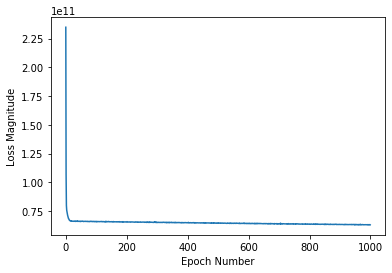

In [236]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);